## Anatomy of a plot

    Learn how to make plots using python matplotlib library. In this tutorial we cover different kinds of plots  e.g., scatter, histograms, vectors. We also cover how to plot fits images.

### Useful links : 
    Matplotlib Quick Start Guide- https://matplotlib.org/stable/users/explain/quick_start.html#quick-start
    Color scheme to consider- https://www.ascb.org/science-news/how-to-make-scientific-figures-accessible-to-readers-with-color-blindness/

We want to plot Schwarzchild radius of different black hole mass

Our input is an array of black hole mass. We calculate the Schwarzchild radius. That defines our x and y data
    x-axis: Mass
    y-axis: Schwarzchild Radius
    
To plot we use plt function from the matplotlib library. You provide the x and y data. 

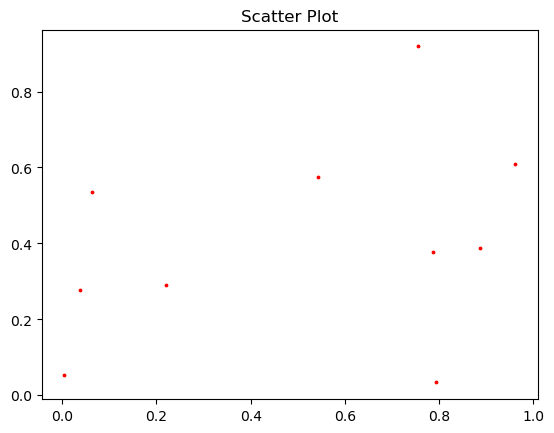

In [8]:
# import relavant functions and libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import c, G
#import a style file. You can uncomment the parameters in the style file and edit them according to your need
plt.style.use('plot_stylev2.txt')

#Create example array of x and y axis 
rng=np.random.default_rng()
x=rng.random(10)
y=rng.random(10)

#Plot figures

#Mandatory inputs
#To plot we use scatter function from the matplotlib library. You provide the x and y data. 

plt.figure(1)
# Plotting function to plot data points. x,y are the coordinates and c is for color, s is for size
plt.scatter(x,y,c='r',s=3)
plt.title('Scatter Plot')
plt.show()

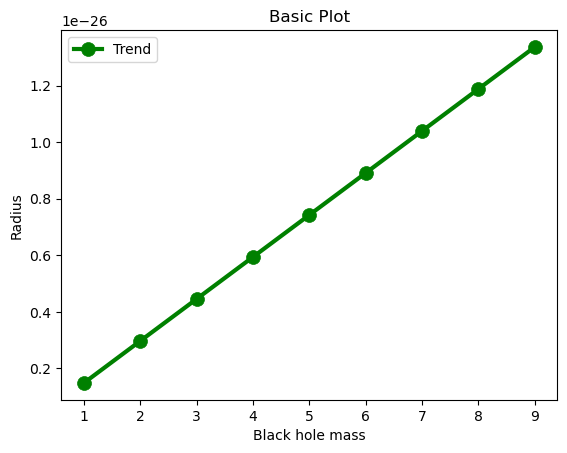

In [7]:
mass = np.arange(1,10,1)
radius = 2 * G * mass / c**2

#Optional inputs
#Provide the formatting for the data. Here we use 'k+' i.e. plus symbol in black color.
#Provide a label for the legend. Here we say 'data'

plt.figure(2)
plt.plot(mass, radius, color = 'g', label = 'Trend')
#Define your x- and y-axis label and size
plt.xlabel('Black hole mass')
plt.ylabel('Radius')
#Add lagend to the plot
plt.legend()
#Add title to the plot
plt.title('Basic Plot')
#Save as a png or other format
plt.savefig('MvsR.png')
plt.show()

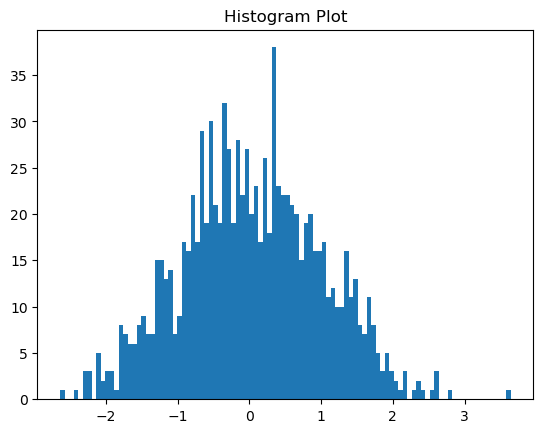

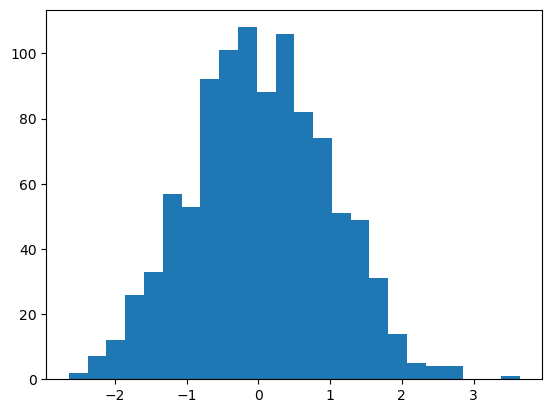

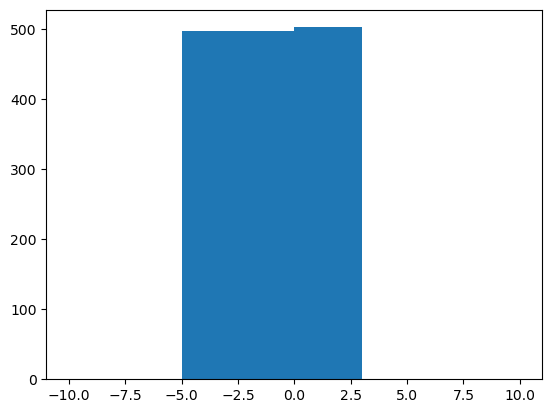

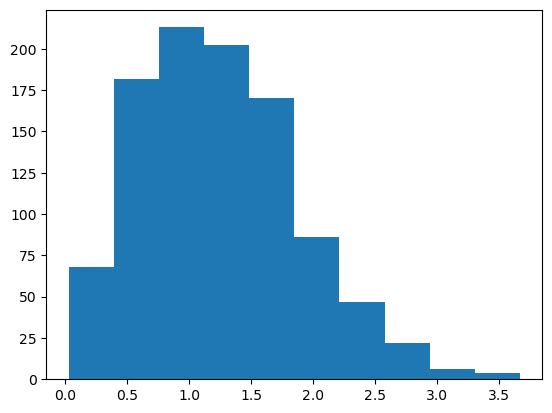

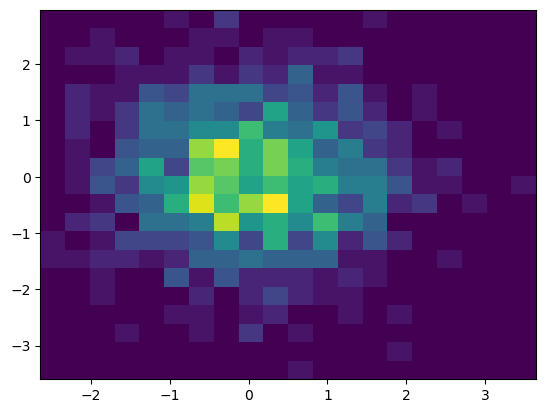

In [6]:
plt.figure(3)
Val=rng.normal(0,1,1000)

# bins can be defined using a value ,array or the argument auto
# vale would fix the number of bins to that specific value
# "auto" would change the number of bins to the value, algorith seems fit
# and the array would set the bins as the lowe and upper limit of the elements for example [1,2,3] would 
# set the bins as [1,2),and [2,3)
plt.hist(Val,bins=100)
plt.title('Histogram Plot')

plt.figure(4)
plt.hist(Val,bins='auto')

plt.figure(5)
plt.hist(Val,bins=[-10,-5,0,3,10])


#plot a histogram of the distance between Value1 and Value2
plt.figure(6)
Val2=rng.normal(0,1,1000)
dist=np.sqrt(Val**2+Val2**2)
plt.hist(dist)

#plot a two-dimensional histogram
plt.figure(7)
plt.hist2d(Val,Val2,bins=20)
plt.show()

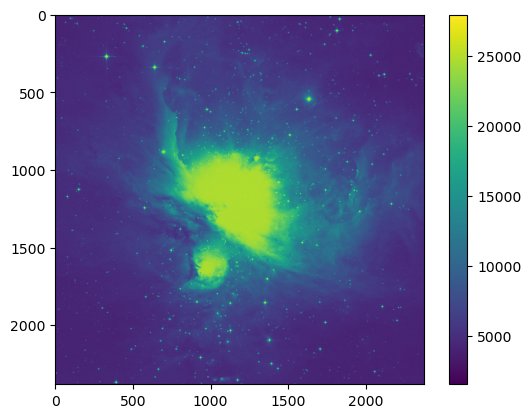

In [7]:
#plot fits image of orion nebula (Credit: NOIRLab)
plt.figure(8)
from astropy.io import fits
irimage = fits.getdata('m42_40min_ir.fits')
plt.imshow(irimage)
plt.colorbar()
plt.show()

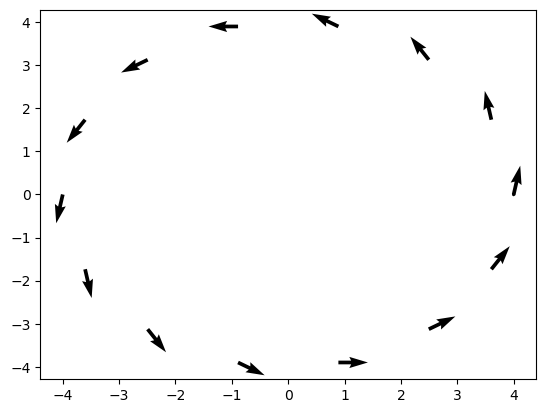

In [11]:
#Make a vector plot
plt.figure(9)
t=np.linspace(0,2*np.pi,15)
X=4*np.cos(t)
Y=4*np.sin(t)
Xd=np.zeros(len(X))
Yd=np.zeros(len(Y))
for i in range(len(X)-1,-1,-1):
    Xd[i]=X[i]-X[i-1]
    Yd[i]=Y[i]-Y[i-1]
# the first two arguments of the quiver function refer to the position of the base.
#while the 3rd and 4th argument define the direction coordinates of the vector  
plt.quiver(X,Y,Xd,Yd)

plt.show()

## Example of using a catalog in fits format.

In this example we use Shen et al. (2011) quasar catalog to plot black hole mass vs quasar luminosity at 5100 Angstrom. The code impliments some quality cuts to select a subsample of quasars.

***Total number of quasars in Shen+2011 =  105783


/var/folders/2v/8157dfy15fl89jfs15n0h0v00000gn/T/ipykernel_44370/3947865988.py:15: RuntimeWarning: invalid value encountered in true_divide
  w1 = np.where((data['SN_Hb_'] > 20.) &  ((data['W_BHb_']/data['e_W_BHb_'])>3) & ((data['EWBHb']/data['e_EWBHb'])>3) & (data['z'] <0.7) & (data['EWBHb']!=0.) & (data['W_BHb_']!=0.) & (data['SDSS']!='105528.80+312411.3') & (data['SDSS']!='151036.74+510854.6') & (data['SDSS']!='094927.67+314110.0'))
/var/folders/2v/8157dfy15fl89jfs15n0h0v00000gn/T/ipykernel_44370/3947865988.py:15: RuntimeWarning: divide by zero encountered in true_divide
  w1 = np.where((data['SN_Hb_'] > 20.) &  ((data['W_BHb_']/data['e_W_BHb_'])>3) & ((data['EWBHb']/data['e_EWBHb'])>3) & (data['z'] <0.7) & (data['EWBHb']!=0.) & (data['W_BHb_']!=0.) & (data['SDSS']!='105528.80+312411.3') & (data['SDSS']!='151036.74+510854.6') & (data['SDSS']!='094927.67+314110.0'))


***Number of quasars in Shen+2011 after S/N cut =  3309


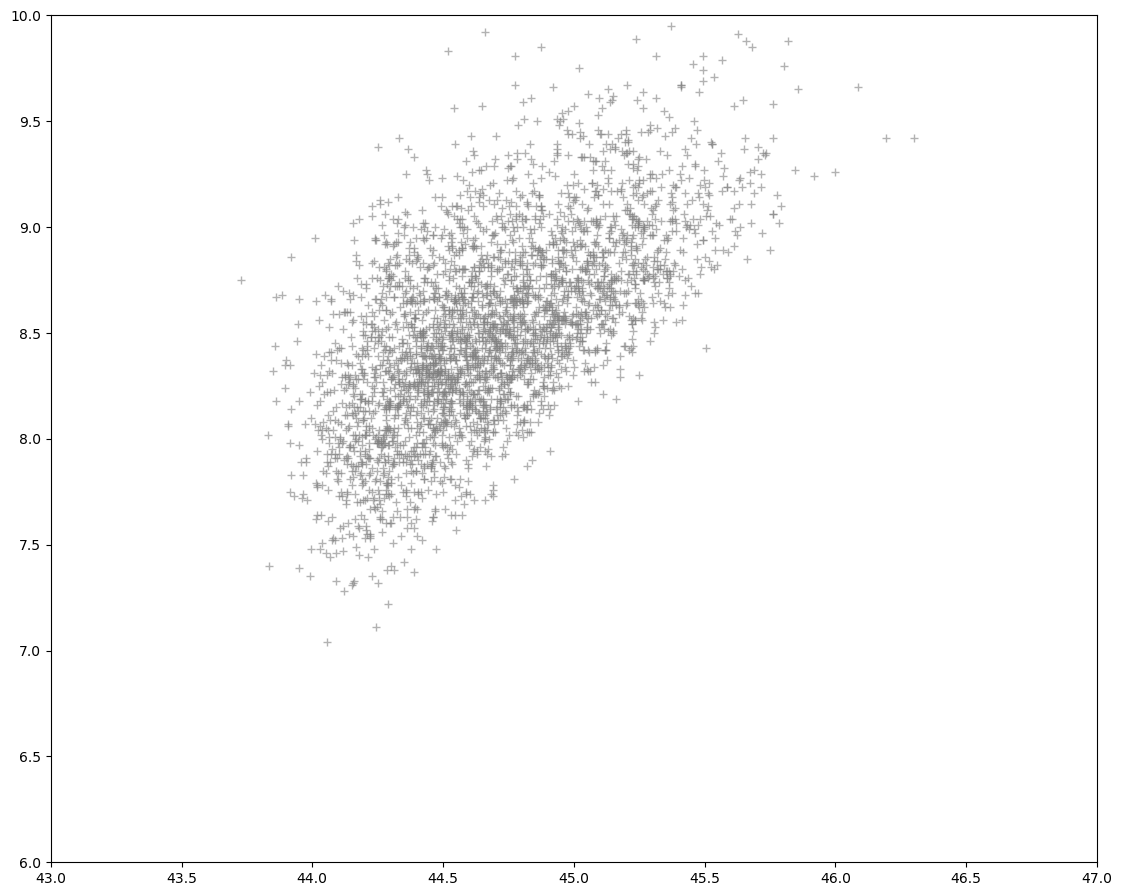

In [1]:
import numpy as np
import math
from astropy.io import fits
from uncertainties import unumpy
from uncertainties import ufloat
from uncertainties.umath import * 
import matplotlib.pyplot as plt

def Shen2011():
    hdulist = fits.open("Shen+2011asu.fit")
    data = hdulist[1].data
    header = hdulist[1].header
    print ("***Total number of quasars in Shen+2011 = ",len(data['z']))
    
    w1 = np.where((data['SN_Hb_'] > 20.) &  ((data['W_BHb_']/data['e_W_BHb_'])>3) & ((data['EWBHb']/data['e_EWBHb'])>3) & (data['z'] <0.7) & (data['EWBHb']!=0.) & (data['W_BHb_']!=0.) & (data['SDSS']!='105528.80+312411.3') & (data['SDSS']!='151036.74+510854.6') & (data['SDSS']!='094927.67+314110.0')) 
    newdata = data[w1]
    print ("***Number of quasars in Shen+2011 after S/N cut = ",len(newdata['z']))

#Black hole mass    
    logMass = unumpy.uarray(newdata['logBHHM'],newdata['e_logBHHM'])

#Luminosity at 5100A
    logL5100 = unumpy.uarray(newdata['logL5100'],newdata['e_logL5100'])

#Example: Plotting Mass vs Luminosity
    fig = plt.figure(figsize=(13.5, 11))
    plt.plot(unumpy.nominal_values(logL5100), unumpy.nominal_values(logMass),'+', color = 'gray', alpha=0.6)
    plt.xlim(43,47)
    plt.ylim(6,10)
    plt.show()

if __name__ == "__main__":
    
    Shen2011()

## Excercise

1. Plot the Flux vs magnitude relationship as a function of Magnitude. Using the formula 
m=-2.5 log(F) + K (assume K is 0)

2. Plot a scatter plot  of Luminosity and Temperature using the pleiades.csv file. (This is an HR diagram!)

3. Plot a histogram using pleiades.csv file based on the Temperature and set bins based on the spectral type 

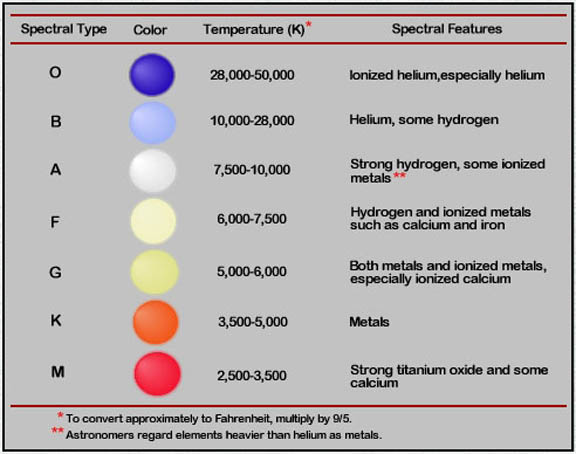
(Image credit: Eugene R. Zizka, https://skyandtelescope.org/observing/stellar-spectral-types-03302016/)

4. Assuming that figure 9 plots the direction of electric fields. Write a code to overplot the direction of magnetic fields. Remember that electric and magnetic field are orthogonal to each other.